The primary libraries of python that we'll be using are:

•	NumPy: Provides a fast-numerical array structure and helper functions.
•	pandas: Provides a Data Frame structure to store data in memory and work with it easily and efficiently.
•	matplotlib: Basic plotting library in Python; most other Python plotting libraries are built on top of it.

Problem Statement:

A Card issuing Bank has over issued its cash and credit card in-order-to increase its market share, even to unqualified applicants. At the same time, most cardholders, irrespective of their repayment ability, overused credit card for consumption and accumulated heavy credit and cash– card debts. The crisis caused the blow to consumer finance confidence and it is a big challenge for both banks and cardholders. From the perspective of risk control, estimating the probability of default will be more meaningful than classifying customers into the binary results – risky and non-risky.
Description of the Data:
This research employed a binary variable – default payment, Y (Yes = 1, No = 0), as the response variable. This study used the following 23 variables as explanatory variables: X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. X2: Gender (1 = male; 2 = female). X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). X4: Marital status (1 = married; 2 = single; 3 = others). X5: Age (year). X6–X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: 0 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; ...; 8 = payment delay for eight months; 9 = payment delay for nine months and above. X12–X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September,2005; X13 = amount of bill statement in August, 2005; X17 = amount of bill statement in April, 2005. X18–X23: Amount of previous payment (NT dollar). X18 = amount paid in September,2005; X19 = amount paid in August,2005; X23 = amount paid in April, 2005. 

Analytics tasks:

•	Analyze the trend on outstanding amount for the bank 
  o	Overall outstanding amount trends
  o	Number of customers with outstanding amount (in different outstanding amount buckets)
  o	Age of outstanding amount analysis
•	Is there any relationship between in outstanding amount / trend with respect to age, education, marriage, credit limit
•	Does outstanding amount / trend affect the default behavior in next month.
•	Identify the errors in dataset



### Problem Statement:
Financial threats are displaying a trend about the credit risk of commercial banks as the incredible improvement in the financial industry has arisen. In this way, one of the biggest threats faces by commercial banks is the risk prediction of credit clients. The goal is to predict the probability of credit default based on credit card owner's characteristics and payment history.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
card = pd.read_excel('default_of_credit_card_clients_0.xlsx')

In [3]:
card.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
card.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
card.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [6]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
card.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<AxesSubplot:xlabel='default payment next month', ylabel='count'>

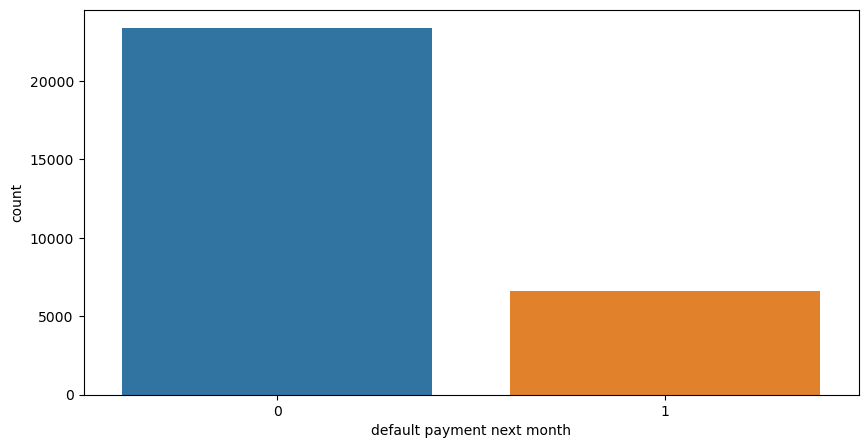

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'default payment next month', data = card)

In [9]:
card['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [10]:
card['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [11]:
df = (card['EDUCATION'] == 5) | (card['EDUCATION'] == 6) | (card['EDUCATION'] == 0)
card.loc[df, 'EDUCATION'] = 4
card['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [12]:
card['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [13]:
df1 = card['MARRIAGE'] == 0
card.loc[df1, 'MARRIAGE'] = 3
card['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [14]:
del card['ID']

In [15]:
card.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [16]:
card = card.rename(columns={'default payment next month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
card.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


<AxesSubplot:xlabel='SEX', ylabel='count'>

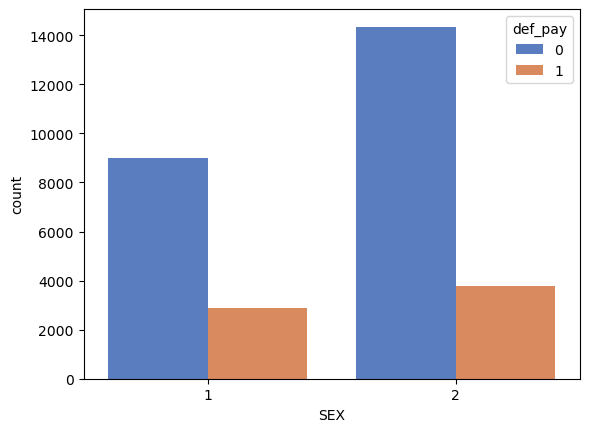

In [17]:
# Checking the number of counts of defaulters and non defaulters sexwise

sns.countplot(x='SEX', data=card,hue="def_pay", palette="muted")  

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

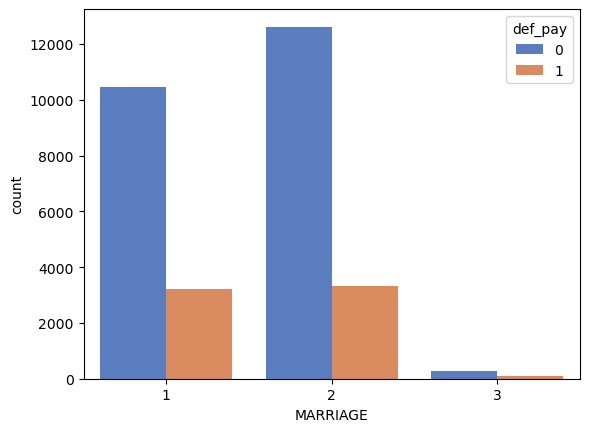

In [18]:
sns.countplot(x="MARRIAGE", data=card,hue="def_pay", palette="muted")

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

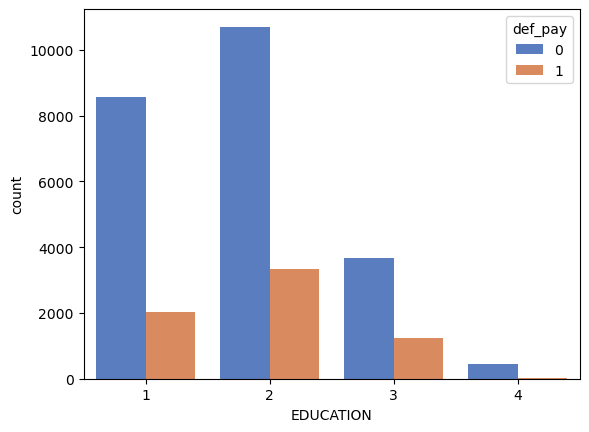

In [19]:
sns.countplot(x="EDUCATION", data=card,hue="def_pay", palette="muted")

In [20]:
#Feature Scaling of Numerical Attributes
fs = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
card[fs] = card[fs].apply(lambda x : (x-np.mean(x))/np.std(x))

In [21]:
card.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
29995,0.404759,1,3,1,0.381275,0,0,0,0,0,...,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,0
29996,-0.134759,1,3,2,0.815221,0,0,0,0,0,...,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,0
29997,-1.059646,1,2,2,0.164303,4,3,2,0,0,...,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,1
29998,-0.674276,1,3,1,0.598248,1,0,0,0,0,...,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,1
29999,-0.905498,1,2,1,1.140680,0,0,0,0,0,...,-0.104582,-0.129669,-0.395592,-0.216481,-0.178866,-0.215582,-0.244230,-0.248683,-0.237130,1


<AxesSubplot:>

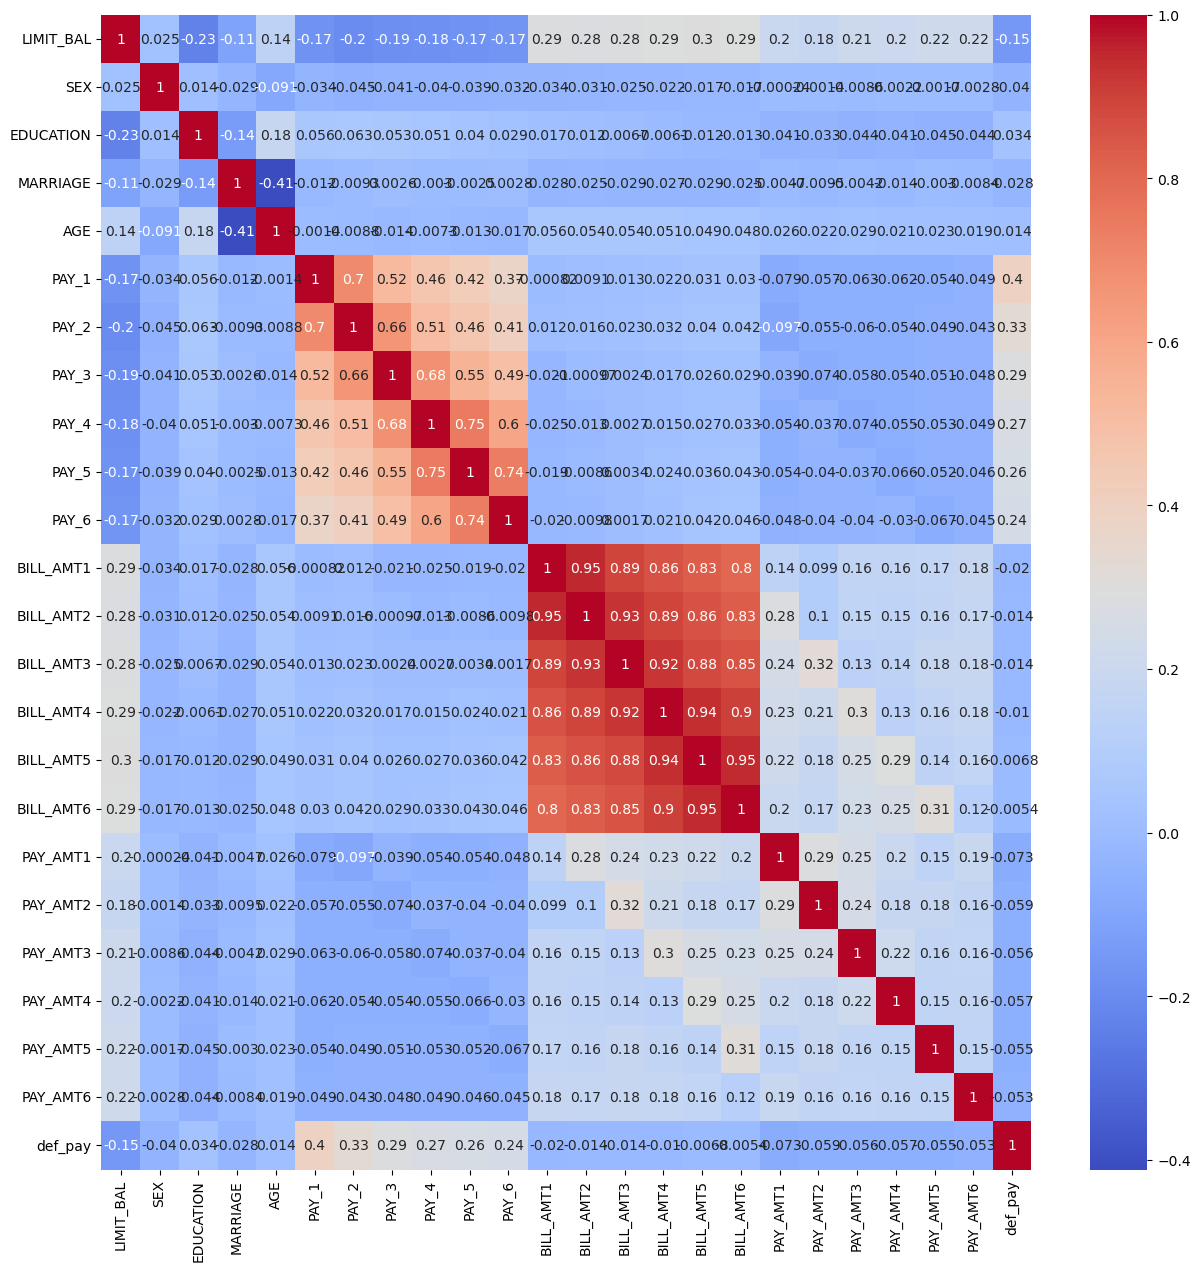

In [22]:
#Creating the figure of the heatmap
plt.figure(figsize = (15,15))
sns.heatmap(card.corr(),annot = True,cmap='coolwarm')

In [23]:
#splitting the data 
X = card.drop('def_pay', axis = 1)
y = card['def_pay']

In [106]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [107]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24000, 23)
(24000,)
(6000, 23)
(6000,)


In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

#model = LogisticRegression()
#model = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', class_weight = None)
#model = DecisionTreeClassifier()
model = XGBClassifier(max_depth= 3, min_child_weight=2, n_estimators= 50)
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [109]:
#Testing
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [110]:
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[4483  813]
 [ 220  484]]


<AxesSubplot:>

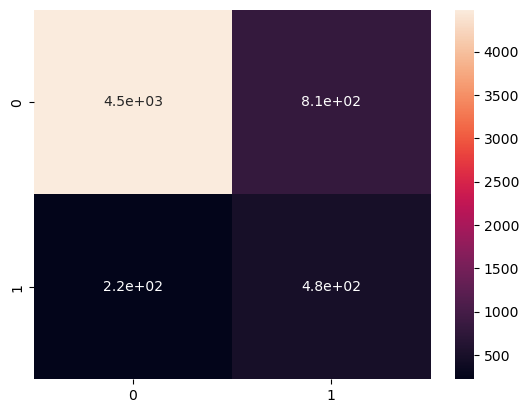

In [111]:
sns.heatmap(cm,annot = True)

In [112]:
cl = classification_report(y_pred, y_test)
print(cl)

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      5296
           1       0.37      0.69      0.48       704

    accuracy                           0.83      6000
   macro avg       0.66      0.77      0.69      6000
weighted avg       0.89      0.83      0.85      6000



In [37]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = model, X = X,\
     y = y, cv = 10)
print("Accuracy Mean {} Accuracy Variance \
     {}".format(accuracies.mean(),accuracies.std()))


Accuracy Mean 0.8205333333333332 Accuracy Variance      0.010727120355021243


In [43]:
from sklearn.model_selection import GridSearchCV
#parameters = {'n_estimators': [200, 400,1000], 'criterion': ['entropy', 'gini'],'class_weight' : ['balanced',None]}
#dt = RandomForestClassifier()
#clf = GridSearchCV(dt, parameters)
#clf.fit(X_train, y_train)
#clf.best_params_

In [41]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [50, 100,150], 'max_depth': [3,5,7,10], 'min_child_weight': [2,3,4,5]}
dt = XGBClassifier()
clf = GridSearchCV(dt, parameters)
clf.fit(X_train, y_train)
clf.best_params_

{'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 50}

In [44]:
# executing the all models 
model_list = [("lr",LogisticRegression()),("dt",DecisionTreeClassifier()),("rf",RandomForestClassifier()),("adb",AdaBoostClassifier())
              ,("svm",SVC()),("bnb",BernoulliNB()),("gnb",GaussianNB()),("xgb",XGBClassifier())]

# accuracy score on test dataset for all models  
for model_name,model in model_list:
    m = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f'{model_name} : {accuracy_score(y_pred,y_test)}')

lr : 0.8206666666666667
dt : 0.731
rf : 0.8231666666666667
adb : 0.825
svm : 0.8263333333333334
bnb : 0.7985
gnb : 0.7725
xgb : 0.8193333333333334


In [45]:
# accuracy score on train dataset for all models  
for model_name,model in model_list:
    m = model.fit(X_train,y_train)
    y_pre = model.predict(X_train)
    print(f'{model_name} : {accuracy_score(y_pre,y_train)}')

lr : 0.8157916666666667
dt : 0.999625
rf : 0.999625
adb : 0.8152916666666666
svm : 0.82225
bnb : 0.792875
gnb : 0.7665833333333333
xgb : 0.88175


### Conclusion
The objective is to estimate the likelihood of a credit card holder defaulting on their payments by considering their personal attributes and past payment behavior.

Also, if we talk about the confusion matrix, it become more important to keep the False Negative(FN) as minimum as possible. because, FN indiactes the default case predicted as not-default which become criitcal as banks earn a major revenue from lending loans and no doubt, it is often associated with risk.

After conducting a thorough analysis of the Accuracy and Recall values across all models, it has been determined that the XGBClassifier stands out as the most optimal model for addressing this problem.